In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import PowerNorm

from sklearn.preprocessing import MinMaxScaler
import umap
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import ttest_ind

from matplotlib_venn import venn2


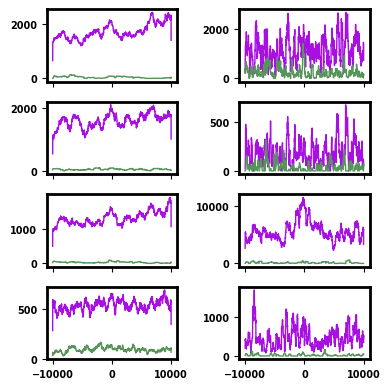

In [2]:

def calculate_signal_distribution(intersect_file, before_anchor=10000, after_anchor=10000):
    # 加载交集结果
    intersect_df = pd.read_csv(intersect_file, sep='\t', header=None)
    
    # 定义anchor区域范围
    region_length = before_anchor + after_anchor
    
    # 初始化信号分布数组
    signal_distribution = np.zeros(region_length)
    #count_distribution = np.zeros(region_length)
    
    # 计算每个anchor的信号分布
    for index, row in intersect_df.iterrows():
        anchor_start = row[1]  # anchor的起始位置
        anchor_end = row[2]  # anchor的结束位置
        h3k_start = row[4]  # H3K信号的起始位置
        h3k_end = row[5]  # H3K信号的结束位置
        signal_strength = row[9]  # 信号强度
        overlap_start = max(anchor_start, h3k_start)
        overlap_end = min(anchor_end, h3k_end)
        
        # 将信号分布到数组中
        anchor_center = (anchor_start + anchor_end) // 2
        relative_start = overlap_start - anchor_center + before_anchor
        relative_end = overlap_end - anchor_center + before_anchor

        for i in range(relative_start, relative_end):
            if 0 <= i < region_length:
                signal_distribution[i] += signal_strength
                #count_distribution[i] += 1  
    return signal_distribution

def smooth_signal(signal, window_size=10):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')


HMpath = 'Samples/AML/allCombine/GG_anchor/'
#HMs = ['H3K4me3','H3K27ac','H3K9ac','H3K36me3','H3K9me1','H3K27me3','H3K9me3','CTCF','RAD21','POLR2A','MYC']
HMs = ['H3K4me3','CTCF','H3K27ac','RAD21','H3K9ac','POLR2A','H3K4me1','YY1']
Samples = ['K562']
#抑制：H3K9me3,H3K27me3,H4K20me,
before_anchor = 10000
after_anchor = 10000
x = np.arange(-before_anchor, after_anchor)

fig, axs = plt.subplots(4, 2, sharex=True, figsize=(4,4)) 

listDistri = []
m = 0
for i in range(4):#Samples
    for j in range(2):#HMs
    
        topfile = HMpath+f'GG.top.{HMs[m]}.intersect.bed'
        lastfile = HMpath+f'GG.last.{HMs[m]}.intersect.bed'
        
        top_distribution = calculate_signal_distribution(topfile)
        lat_distribution = calculate_signal_distribution(lastfile)
        
        
        top_distribution_smoothed = smooth_signal(top_distribution)
        lat_distribution_smoothed = smooth_signal(lat_distribution)
    
        axs[i,j].plot(x, top_distribution_smoothed,label='top',color='#a80fe1',linewidth=1)
        axs[i,j].plot(x, lat_distribution_smoothed,label = 'last',color='#56945A',linewidth=1)
    
        axs[i,j].spines['top'].set_linewidth(2)   
        axs[i,j].spines['bottom'].set_linewidth(2)
        axs[i,j].spines['left'].set_linewidth(2)  
        axs[i,j].spines['right'].set_linewidth(2)
        m+=1
    
        for label in axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels():
            label.set_fontsize(7)
            label.set_fontweight('bold')

plt.subplots_adjust(hspace=0)
plt.tight_layout()
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/AMLfig/top_last_plot.png',dpi=300, bbox_inches='tight')

# 显示图形
plt.show()



/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_81448/3398413794.py:111: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


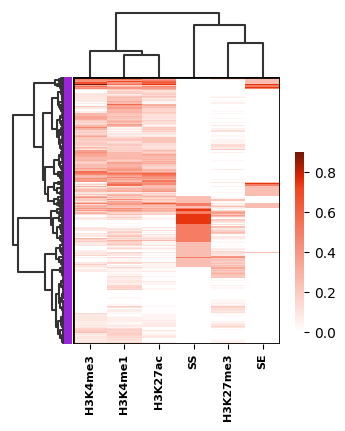

In [3]:
def min_max(df,cl,new_cl):
    df[new_cl] = (df[cl]-df[cl].min())/(df[cl].max()-df[cl].min())

HMpath = 'Samples/AML/allCombine/GG_loop/'
hisnameList = []

toploop = HMpath+'GG.top_loop.bedpe'
lsatloop = HMpath+'GG.last_loop.bedpe'
toploopdf = pd.read_csv(toploop,sep='\t',header=None)
lastloopdf = pd.read_csv(lsatloop,sep='\t',header=None)
loop = pd.concat([toploopdf,lastloopdf])
loop = loop.reset_index(drop=True)

HMs = ['H3K4me1','H3K4me3','H3K9ac','H3K9me1','H3K9me3','H3K27ac','H3K27me3','H3K36me3','H4K20me1','H3K79me2','CTCF','RAD21','POLR2A','YY1','MYC','SS']
#HMs = ['CTCF']
#HMs = ['SE','SS']
HMpath2 = 'Samples/AML/allCombine/GG_loop/newSE/'
for HM in HMs:

    topfile = HMpath2+f'GG.top_loop.{HM}_2.csv'
    lastfile = HMpath2+f'GG.last_loop.{HM}_2.csv'
    
    topdf = pd.read_csv(topfile)
    lastdf = pd.read_csv(lastfile)
    
    HMdf = pd.concat([topdf,lastdf])
    HMdf = HMdf.reset_index(drop=True)

    
    min_max(HMdf,'L0','L0_1')
    min_max(HMdf,'R0','R0_1')
    
    
    loop[HM] = HMdf[['L0_1', 'R0_1']].mean(axis=1)
    hisnameList.append(HM)


HM = 'SE'
topfile = HMpath2+f'GG.top_loop.{HM}_caofan.csv'
lastfile = HMpath2+f'GG.last_loop.{HM}_caofan.csv'
# topfile = HMpath2+f'GG.top_loop.{HM}_kaijing.csv'
# lastfile = HMpath2+f'GG.last_loop.{HM}_kaijing.csv'
topdf = pd.read_csv(topfile)
lastdf = pd.read_csv(lastfile)

HMdf = pd.concat([topdf,lastdf])
HMdf = HMdf.reset_index(drop=True)


min_max(HMdf,'L0','L0_1')
min_max(HMdf,'R0','R0_1')


loop[HM] = HMdf[['L0_1', 'R0_1']].mean(axis=1)
hisnameList.append(HM)


row_colors = ['#9A24D9'] * 1000 + ['#56945A'] * 1000  # 前100行红色，后100行蓝色
#row_colors = ['orange'] * 1000 + ['green'] * 1000 
#colors = ['#feefec','#fddfd9','#fcd0c7','#fac0b4','#f9b1a2','#f8a18f','#f7927d','#f6836a','#f57358','#f46445','#f25433','#f14520','#dc2700','#a61e01','#751702']
colors = ['#FFFFFF','#feefec','#fddfd9','#fcd0c7','#fac0b4','#f9b1a2','#f8a18f','#f7927d','#f6836a','#f57358','#f46445','#f25433','#f14520','#dc2700','#a61e01','#751702']

cmap = LinearSegmentedColormap.from_list("CustomRed", colors)

#hisnameList = ['H3K4me3','H3K9ac','H3K9me1','H3K9me3','H3K27ac','H3K27me3','H4K20me1','H3K79me2','CTCF','RAD21','POLR2A','YY1','MYC','SE','SS']
#hisnameList = ['H3K4me1','H3K4me3','H3K9ac','H3K9me1','H3K9me3','H3K27ac','H3K27me3','H4K20me1','H3K79me2','SE','SS']
hisnameList = ['H3K4me1','H3K4me3','H3K27ac','H3K27me3','SE','SS']

g = sns.clustermap(loop[hisnameList].iloc[:1000], cmap=cmap,method ='ward',metric='euclidean', 
                   #col_colors=[col_colors],
                   row_colors=[row_colors],
                   yticklabels=False,
                   xticklabels=True,
                   row_cluster=True,
                   col_cluster=True,
                   figsize=(3,4.5),
                   #figsize=(3,15),
                   tree_kws={'linewidths':1.5},
               cbar_pos=(1, 0.25, 0.03, 0.4))

# num_rows = loop[hisnameList].iloc[:1000].shape[0]
# g.ax_heatmap.set_yticks(range(num_rows))
# g.ax_heatmap.set_yticklabels(range(1, num_rows + 1), fontsize=5)  # 设置y轴标签为1到num_rows的序号


# 添加边框
#for _, ax in g.ax_row_dendrogram.collections:  # remove row dendrogram
#     ax.set_visible(False)
# for _, ax in g.ax_col_dendrogram.collections:  # remove column dendrogram
#     ax.set_visible(False)


# # 在每个单元格周围添加线
# for i in range(1, loop[hisnameList].shape[0]):
#     g.ax_heatmap.axhline(y=i, color='black', linewidth=0.5)

# for i in range(1, loop[hisnameList].shape[1]):
#     g.ax_heatmap.axvline(x=i, color='black', linewidth=0.5)
    
# # 为热图添加边框
g.ax_heatmap.axhline(y=0, color='black', linewidth=2)
#g.ax_heatmap.axhline(y=999, color='black', linewidth=1)
g.ax_heatmap.axhline(y=1000, color='black', linewidth=2)

g.ax_heatmap.axvline(x=0, color='black', linewidth=2)
g.ax_heatmap.axvline(x=6, color='black', linewidth=2)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=8,fontweight='bold')


plt.tight_layout()
#plt.savefig(f'figs/AMLfig/heatmap_top_loop_top.png',dpi=300,bbox_inches='tight')

plt.show()

In [4]:
# gene 
v36 = pd.read_csv('/Users/daodao/Downloads/GEproject/GEfeaAnalysis/v36Gene.bed',sep='\t',header=None)
v36['gene_id2'] = v36[3].str.split('.').str[0]
v36dic = {}
for i in range(v36.shape[0]):
    v36dic[v36.loc[i]['gene_id2']] = v36.loc[i][4]
    
# RNS-Seq 
dfGe = pd.read_csv('TARGET-AML_allAML_Nor.tsv',sep='\t')

gene1 = []


for i in range(dfGe.shape[0]):
    gene1Ind = dfGe.loc[i]['gene_id2']
    if gene1Ind in v36dic:
        gene1.append(v36dic[gene1Ind])
    else:
        gene1.append('NA')
dfGe['gene1'] = gene1

# oncogene
dfcancerGlist = pd.read_csv('/Users/daodao/Downloads/GEproject/GEfeaAnalysis/new-cancerGeneList.tsv',sep='\t')
cancerGlist = dfcancerGlist['Hugo Symbol'].tolist()
imporGene = dfcancerGlist[(dfcancerGlist['Is Oncogene']=='Yes')]
# imporGene2 = dfcancerGlist[(dfcancerGlist['Is Tumor Suppressor Gene']=='Yes')]
# imporGene = imporGene[['Hugo Symbol','Entrez Gene ID','GRCh37 Isoform','GRCh38 Isoform','Is Oncogene','Is Tumor Suppressor Gene']]
# #imporGene.to_csv('/Volumes/Expansion/Dao/TCGA/OncoTSG_genes.tsv',sep='\t',header=None)
# TSG_genes = imporGene2['Hugo Symbol'].tolist()
Onco_genes = imporGene['Hugo Symbol'].tolist()

In [5]:
# AML and healthy predictions for 1000 k562 GGIs 
re = pd.read_csv('figureData/AML_Nor_GG.PredictRe.csv')#AML_Nor_EP.PredictRe.csv
df = pd.read_csv('Samples/AML/allCombine/top_GG_1k_pvalue.bedpe',sep='\t',header=None)
dfre = pd.concat([df,re],axis=1)

In [6]:
# oncogene in top 1000 K562 GGIs
dfre_onco = dfre[(dfre[4].isin(Onco_genes))|(dfre[9].isin(Onco_genes))]

geneIndfre_onco = list(set(dfre_onco[4].tolist()+dfre_onco[9].tolist()))
oncoIndfre_onco = []
for i in geneIndfre_onco:
    if i in Onco_genes:
        oncoIndfre_onco.append(i)
    else:
        pass
        
print(oncoIndfre_onco)

['H1-4', 'STAT5A', 'MEF2B', 'MYCL', 'MPL', 'LCK', 'TNFSF13', 'FGF8']


In [7]:
dfGe2 = dfGe[dfGe['gene1'].isin(geneIndfre_onco)]
dfGe2_topGene = pd.DataFrame(dfGe2[dfGe2.columns[4:-1]].sum()/dfGe2.shape[0])

amlGE = []
healGE = []
for i in dfGe2_topGene.index:
    if 'AML' in i:
        amlGE.append(dfGe2_topGene.loc[i][0])
    else:
        healGE.append(dfGe2_topGene.loc[i][0])
print(sum(amlGE)/len(amlGE),sum(healGE)/len(healGE))

dfGe2_topGene['samples'] = dfGe2_topGene.index
dfGe2_topGene = dfGe2_topGene.reset_index(drop=True)
dfGe2_topGene.columns = ['GE','samples']



8.055007812499998 9.24280186403509


In [8]:

amlCol = ['AML'+str(i) for i in range(1,41)]
norCol = ['Nor'+str(i) for i in range(1,39)]

dfre_onco2 = dfre_onco[amlCol+norCol]

dfre_onco2 = dfre_onco2.apply(lambda x: x.map(lambda v: 1 if v >= 0.5 else 0))
sum_dfre_onco2 = pd.DataFrame(dfre_onco2.sum())

label = []
for i in sum_dfre_onco2.index:
    if 'AML' in i:
        label.append(1)
    else:
        label.append(0)
sum_dfre_onco2['label'] = label

# sum_dfre_onco2 = sum_dfre_onco2.sort_values(by=0, ascending=True)
sum_dfre_onco2['samples'] = sum_dfre_onco2.index
# sum_dfre_onco2 = sum_dfre_onco2.reset_index(drop=True)

dfGe2_topGene_sumGGI = pd.merge(dfGe2_topGene, sum_dfre_onco2, on='samples', how='inner')
dfGe2_topGene_sumGGI = dfGe2_topGene_sumGGI.sort_values(by=0, ascending=True)
dfGe2_topGene_sumGGI = dfGe2_topGene_sumGGI.reset_index(drop=True)


pos_indices= [] 
neg_indices= [] 
pos_vals = []
neg_vals = []

curve_data = []

for i in range(dfGe2_topGene_sumGGI.shape[0]):
    curve_data.append(dfGe2_topGene_sumGGI.loc[i]['GE'])
    
    if dfGe2_topGene_sumGGI.loc[i]['label'] == 0:
        neg_indices.append(i)
        neg_vals.append(dfGe2_topGene_sumGGI.loc[i][0])
    else:
        pos_indices.append(i)
        pos_vals.append(dfGe2_topGene_sumGGI.loc[i][0])
        


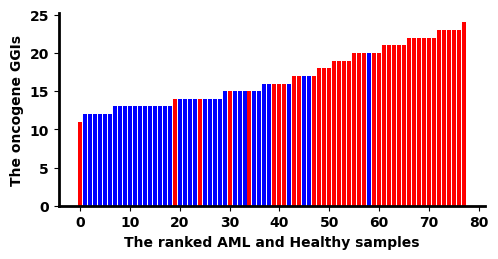

In [9]:
#oncogene GGI

#curve_data = np.random.random(size=len(pos_indices) + len(neg_indices)) * 10 

# 创建图形和坐标轴
fig, ax1 = plt.subplots(figsize=(5.5, 2.5))

# 绘制散点图
ax1.bar(neg_indices, neg_vals, color='blue', label='Healthy')
ax1.bar(pos_indices, pos_vals, color='red', label='AML')

# 设置图例
#ax1.legend(loc='upper left', bbox_to_anchor=(0., 0.9), prop={'size': 10, 'weight': 'bold'})

# 设置标题和轴标签
#ax1.set_title('Sorted GGIs count of every sample', fontsize=10, fontweight='bold')
ax1.set_xlabel('The ranked AML and Healthy samples', fontsize=10, fontweight='bold')
ax1.set_ylabel('The oncogene GGIs', fontsize=10, fontweight='bold')

# 设置轴的样式
ax1.spines['top'].set_linewidth(0)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(0)

#ax1.set_ylim(700, 900)

# 设置刻度标签的样式
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(10)  # 设置字体大小
    label.set_fontweight('bold')  # 设置字体粗细

# 创建共享x轴的新坐标轴
# ax2 = ax1.twinx()
# ax2.plot(range(len(curve_data)), curve_data, 'g-', label='Curve Data')  # 绘制曲线
# ax2.set_ylabel('Gene expression level', fontsize=10, fontweight='bold')  # 设置右侧y轴标签

#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/AMLfig/oncoGGI.png',dpi=300, bbox_inches='tight')

plt.show()


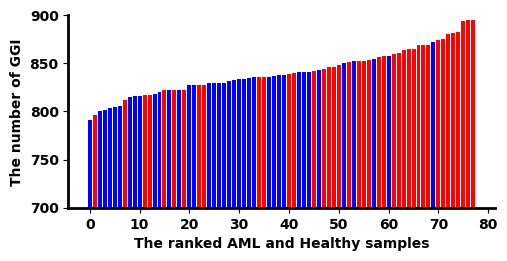

In [10]:
# the number of GGI for different samples among top 1000 K562 GGI

re2 = re.apply(lambda x: x.map(lambda v: 1 if v >= 0.5 else 0))
resum = pd.DataFrame(re2.sum())

label = []
for i in resum.index:
    if 'AML' in i:
        label.append(1)
    else:
        label.append(0)
resum['label'] = label

resum = resum.sort_values(by=0, ascending=True)
resum['samples'] = resum.index
resum = resum.reset_index(drop=True)


pos_indices= [] 
neg_indices= [] 
pos_vals = []
neg_vals = []

#curve_data = []

for i in range(resum.shape[0]):
    #curve_data.append(resum.loc[i]['GE'])
    
    if resum.loc[i]['label'] == 0:
        neg_indices.append(i)
        neg_vals.append(resum.loc[i][0])
    else:
        pos_indices.append(i)
        pos_vals.append(resum.loc[i][0])


#curve_data = np.random.random(size=len(pos_indices) + len(neg_indices)) * 10 

# 创建图形和坐标轴
fig, ax1 = plt.subplots(figsize=(5.5, 2.5))

# 绘制散点图
ax1.bar(neg_indices, neg_vals, color='blue', label='Healthy')
ax1.bar(pos_indices, pos_vals, color='red', label='AML')

# 设置图例
#ax1.legend(loc='upper left', bbox_to_anchor=(0., 0.9), prop={'size': 10, 'weight': 'bold'})

# 设置标题和轴标签
#ax1.set_title('Sorted GGIs count of every sample', fontsize=10, fontweight='bold')
ax1.set_xlabel('The ranked AML and Healthy samples', fontsize=10, fontweight='bold')
ax1.set_ylabel('The number of GGI', fontsize=10, fontweight='bold')

# 设置轴的样式
ax1.spines['top'].set_linewidth(0)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(0)

ax1.set_ylim(700, 900)

# 设置刻度标签的样式
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(10)  # 设置字体大小
    label.set_fontweight('bold')  # 设置字体粗细

# 创建共享x轴的新坐标轴
# ax2 = ax1.twinx()
# ax2.plot(range(len(curve_data)), curve_data, 'g-', label='Curve Data')  # 绘制曲线
# ax2.set_ylabel('Gene expression level', fontsize=10, fontweight='bold')  # 设置右侧y轴标签
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/AMLfig/allGGI.png',dpi=300, bbox_inches='tight')

# 显示图形
plt.show()


(71, 94) (27, 94) (85, 94) (817, 94)


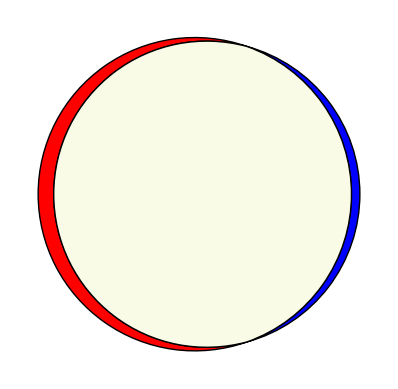

In [11]:
re = pd.read_csv('figureData/AML_Nor_GG.PredictRe.csv')#AML_Nor_EP.PredictRe.csv
df = pd.read_csv('Samples/AML/allCombine/top_GG_1k_pvalue.bedpe',sep='\t',header=None)

dfre = pd.concat([df,re],axis=1)
# sorted_df = dfre.sort_values(by=dfre.columns[11])
# topdf = sorted_df.head(100)
topdf = dfre
amlCol = ['AML'+str(i) for i in range(1,41)]
norCol = ['Nor'+str(i) for i in range(1,39)]

AMLMeanPre = list(topdf[amlCol].mean(axis=1))
NorMeanPre = list(topdf[norCol].mean(axis=1))
topdf['meanPreaml'] = AMLMeanPre
topdf['meanPrenor'] = NorMeanPre

AMLpre = []
Norpre = []
for i in AMLMeanPre:
    if i>= 0.5:
        AMLpre.append(1)
    else:
        AMLpre.append(0)

for i in NorMeanPre:
    if i>= 0.5:
        Norpre.append(1)
    else:
        Norpre.append(0)
        
topdf['Preaml'] = AMLpre
topdf['Prenor'] = Norpre

AML_unique = topdf[(topdf['Preaml']==1) & (topdf['Prenor']==0)]
Nor_unique = topdf[(topdf['Preaml']==0) & (topdf['Prenor']==1)]
AMLNor_same1 = topdf[(topdf['Preaml']==0) & (topdf['Prenor']==0)]
AMLNor_same2 = topdf[(topdf['Preaml']==1) & (topdf['Prenor']==1)]

print(AML_unique.shape,Nor_unique.shape,AMLNor_same1.shape,AMLNor_same2.shape)


# 定义特有值和共同值的数量
# aml_unique = 30
# healthy_unique = 5
# common = 65

aml_unique = AML_unique.shape[0]
healthy_unique = Nor_unique.shape[0]
common = AMLNor_same1.shape[0]+AMLNor_same2.shape[0]

# 生成Venn图，指定颜色
venn = venn2(subsets=(aml_unique, healthy_unique, common), set_labels=('', ''),subset_label_formatter=lambda x: '')
venn.get_patch_by_id('10').set_color('red')
venn.get_patch_by_id('01').set_color('blue')
venn.get_patch_by_id('11').set_color('#f9fbe7')

for patch_id in ['10', '01', '11']:
    venn.get_patch_by_id(patch_id).set_alpha(1)


# # 调整透明度和边框
for patch in venn.patches:
    if patch:
        # patch.set_alpha(1)
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

# 设置数字的字体大小和加粗
# for text in venn.subset_labels:
#     if text:
#         text.set_fontsize(16)
#         text.set_fontweight('bold')
#plt.title("Venn Diagram of AML and Healthy Unique and Common Values")
#plt.savefig(f'/Users/daodao/Downloads/GEproject/figs/AMLfig/venn-top1000.png',dpi=300, bbox_inches='tight')

plt.show()


In [23]:
AMLnor = pd.concat([AML_unique,Nor_unique])
AMLnor = AMLnor[amlCol+norCol]

a = list(AMLnor.T.index)
b = []
for i in a:
    if 'AML' in i:
        b.append(1)
    else:
        b.append(0)

class_labels = pd.Series(b, index=AMLnor.T.index)
class_colors={0: '#0aa4ab', 1: 'orange'}
col_colors = class_labels.map(class_colors)

/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_81448/392588179.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


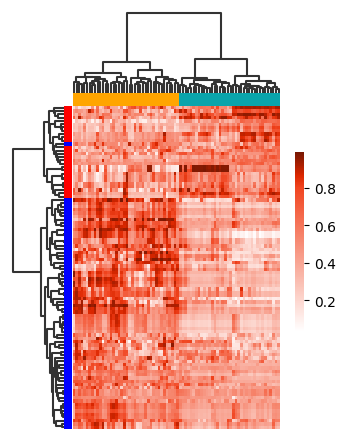

In [25]:
row_colors = ['blue'] * 71 + ['red'] * 27  # 前100行红色，后100行蓝色
#row_colors = ['orange'] * 1000 + ['green'] * 1000 
#colors = ['#feefec','#fddfd9','#fcd0c7','#fac0b4','#f9b1a2','#f8a18f','#f7927d','#f6836a','#f57358','#f46445','#f25433','#f14520','#dc2700','#a61e01','#751702']
colors = ['#FFFFFF','#feefec','#fddfd9','#fcd0c7','#fac0b4','#f9b1a2','#f8a18f','#f7927d','#f6836a','#f57358','#f46445','#f25433','#f14520','#dc2700','#a61e01','#751702']

cmap = LinearSegmentedColormap.from_list("CustomRed", colors)

g = sns.clustermap(AMLnor, cmap=cmap,method ='ward',metric='euclidean', 
                   col_colors=[col_colors],
                   row_colors=[row_colors],
                   yticklabels=False,
                   xticklabels=False,
                   row_cluster=True,
                   col_cluster=True,
                   figsize=(3,4.5),
                   #figsize=(3,15),
                   tree_kws={'linewidths':1.5},
               cbar_pos=(1, 0.25, 0.03, 0.4))


plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=8,fontweight='bold')


plt.tight_layout()

plt.show()

0


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


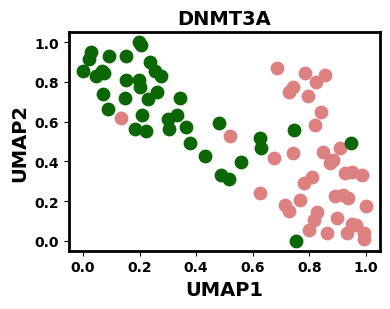

1


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


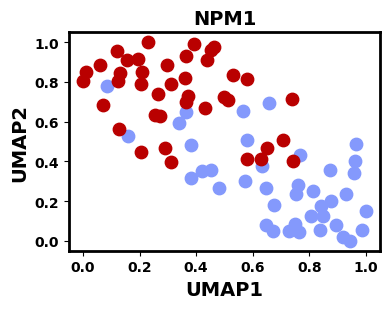

2


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


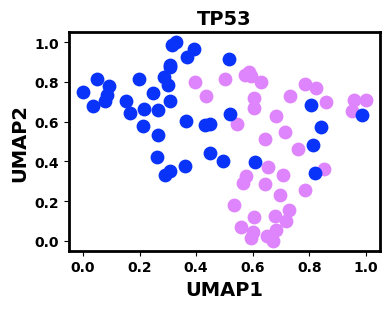

3


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


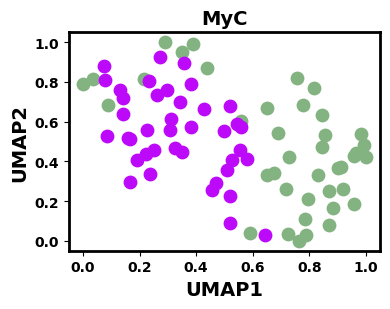

4


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


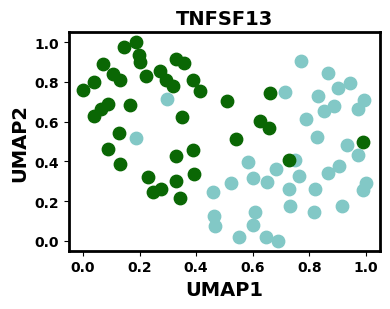

5


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


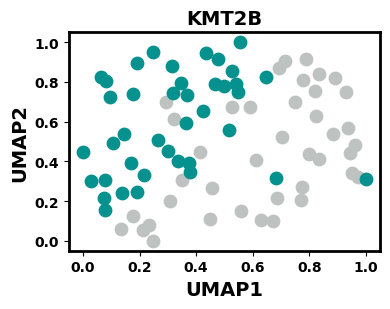

6


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


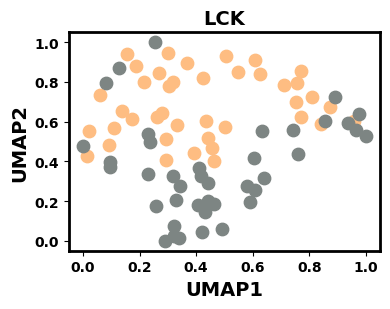

7


/Users/daodao/Downloads/ENTER/envs/tf/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


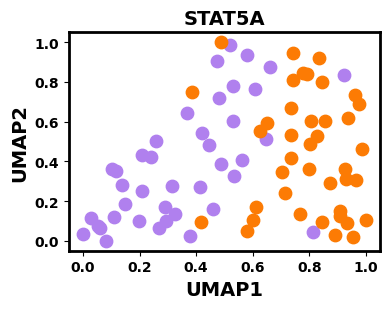

In [32]:
#DNMT3A ENSG00000119772
#MEIS1 ENSG00000143995
#STAT5A ENSG00000126561 
#MyC ENSG00000136997
#DNMT1

import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):
    """
    Lighten the given color by multiplying (1-luminosity) by the given amount.

    Parameters:
    - color (str): The color to lighten. Can be a hex string or a matplotlib color name.
    - amount (float): The amount to lighten the color. Must be between 0 and 1.

    Returns:
    - lighter_color (str): The lightened color as a hex string.
    """
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgba(c)
    c = [c[0] + (1.0 - c[0]) * amount,
         c[1] + (1.0 - c[1]) * amount,
         c[2] + (1.0 - c[2]) * amount]
    return mcolors.to_hex(c)




genes = ['DNMT3A','NPM1','TP53','MyC','TNFSF13','KMT2B','LCK','STAT5A']

#genes = ['DNMT3A','NPM1','MyC','C-KIT','ASXL1','FLT3','C-KIT','RUNX1','WT1','ASXL1','MEIS1','TP53']


#genes = ['PORCN','KDM6B','CKLF_CMTM1','UBE2L6','MEF2B','KMT2B','ID3']

colPos = ['#0a6704','#b90000','#0933f9','#bd09f9','#0a6704','#05918d','#7d8583','#fc7b04','#6100dc','#0a0000','#bb0578']
#colPos = ['#20a519','#CD5C5C','#df153c','#B34467']
#colNeg = ['#e47bee','#EDB381','#73A9C2','#659EC7']
mak = {1:'o',0:'s'}
la = {1:'high',0:'low'}

for x in range(len(genes)):
    print(x)
    df = pd.read_csv(f'Samples/AML/LAML/Pre/{genes[x]}.Pre.csv')
    #df = df.loc[AMLGGIindex+HealthyGGIindex]
    #df = df.loc[AMLGGIindex]

    alldf_t = df.T
    
    ind = []
    for i in alldf_t.index:
        if 'low' in i:
            ind.append(0)
        else:
            ind.append(1)
        
    alldf_t['label'] = ind
    
    data = alldf_t.drop(columns=['label'])
    labels = alldf_t['label']

    reducer = umap.UMAP(random_state=80)
    redu_fea = reducer.fit_transform(data)
    redu_data = np.vstack((redu_fea.T, labels.T)).T 
    
    tsne_df = pd.DataFrame(data=redu_data, columns=['Dimension1', 'Dimension2', "label"])
    
    scaler = MinMaxScaler()
    tsne_df[['Dimension1', 'Dimension2']] = scaler.fit_transform(tsne_df[['Dimension1', 'Dimension2']])
    
    fig, ax = plt.subplots(figsize=(4, 3.2))
    
    geneCol = {'DNMT3A':'red','MyC':'green','STAT5A':'purple','MEIS1':'yellow'}
    #reverse_dict = {value: key for key, value in ind.items()}
    

    lightened_color = lighten_color(colPos[x+1], amount=0.5)

    co = {1:colPos[x],0:lightened_color} 
    #co = {1:'red',0:'blue'} 
    
    for i in set(ind):
        p1 = tsne_df[tsne_df['label'] == i]
        x1 = p1.values[:, 0]
        y1 = p1.values[:, 1]
        ax.scatter(x1, y1, marker='o', c=co[i], label=genes[x]+'-'+la[i], s=80)#,edgecolors='black')#c=colors[i], label=reverse_dict.get(i),
        
    ax.spines['top'].set_linewidth(2)   
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)  
    ax.spines['right'].set_linewidth(2) 

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10)  # Set font size
        label.set_fontweight('bold')  # Set font weight
        
    ax.set_title(f'{genes[x]}',fontsize=14,fontweight='bold')

    plt.xlabel('UMAP1',fontsize=14,fontweight='bold')
    plt.ylabel('UMAP2',fontsize=14,fontweight='bold')
    #plt.legend(loc='lower right',prop={'weight': 'bold','size':10})#, bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    #plt.savefig(f'/Users/daodao/Downloads/GEproject/Samples/AML/LAML/figs/{genes[x]}_allSamplesUMAP.png', dpi=300,bbox_inches='tight')  # Updated file name for clarity
    plt.show()

DNMT3A
Adjusted Rand Index (ARI): 0.5570188086769842
Normalized Mutual Information (NMI): 0.4834841348973284
Calinski-Harabasz Index: 289.2294362452072
Davies-Bouldin Index: 0.45210387959870196
NPM1
Adjusted Rand Index (ARI): 0.48347809365084454
Normalized Mutual Information (NMI): 0.39225958178080705
Calinski-Harabasz Index: 202.61780006502832
Davies-Bouldin Index: 0.5751175804681039
TP53
Adjusted Rand Index (ARI): 0.17044589864556384
Normalized Mutual Information (NMI): 0.14118101392568247
Calinski-Harabasz Index: 94.07243227110573
Davies-Bouldin Index: 0.8316755565422049
MyC
Adjusted Rand Index (ARI): 0.21585419587422391
Normalized Mutual Information (NMI): 0.17384960126076032
Calinski-Harabasz Index: 203.28405958920365
Davies-Bouldin Index: 0.5604120786360463
TNFSF13
Adjusted Rand Index (ARI): 0.5570188086769842
Normalized Mutual Information (NMI): 0.4834841348973284
Calinski-Harabasz Index: 122.23846743472093
Davies-Bouldin Index: 0.7267551784503783
KMT2B
Adjusted Rand Index (ARI)

/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_81448/263309126.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


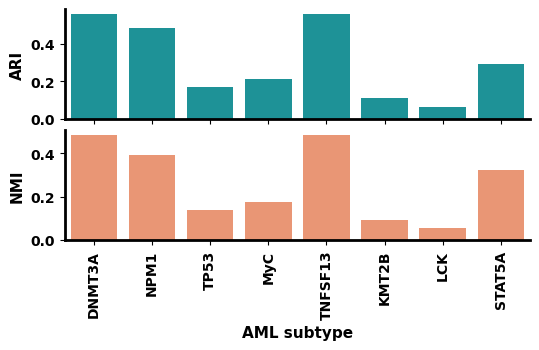

In [34]:
import umap
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
genes = ['DNMT3A', 'NPM1','TP53','MyC','TNFSF13','KMT2B','LCK','STAT5A']
ARI = []
NMI = []

for name in genes:
    print(name)
    df = pd.read_csv(f'Samples/AML/LAML/Pre/{name}.Pre.csv')
    
    alldf_t = df.T
    
    ind = []
    for i in alldf_t.index:
        if 'low' in i:
            ind.append(0)
        else:
            ind.append(1)
        
    alldf_t['label'] = ind
    
    data = alldf_t.drop(columns=['label'])
    labels = alldf_t['label']
    
    #### 高斯混合模型 (GMM) 聚类
    y_true = labels
    reducer = umap.UMAP(n_components=2)
    redu_fea = reducer.fit_transform(data)
    
    gmm = GaussianMixture(n_components=2, random_state=80)
    y_pred = gmm.fit_predict(redu_fea)
    
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    ARI.append(ari)
    NMI.append(nmi)
    ch_score = calinski_harabasz_score(redu_fea, y_pred)
    db_score = davies_bouldin_score(redu_fea, y_pred)
    newre = [ari,nmi,ch_score,db_score]
    #re.append(newre)
    
    print("Adjusted Rand Index (ARI):", ari)
    print("Normalized Mutual Information (NMI):", nmi)
    print("Calinski-Harabasz Index:", ch_score)
    print("Davies-Bouldin Index:", db_score)




fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3), sharex=True)  # 2行1列，sharex=True表示共享x轴


sns.barplot(x=genes, y=ARI, ax=ax1,color='#0aa4ab')
sns.barplot(x=genes, y=NMI,ax=ax2, color='#fc8d62')
#ax2.set_title('Relative Change')


ax1.spines['top'].set_linewidth(0)   
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)  
ax1.spines['right'].set_linewidth(0)  
ax2.spines['top'].set_linewidth(0)   
ax2.spines['bottom'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2)  
ax2.spines['right'].set_linewidth(0)
# plt.xlabel('UMAP1',fontsize=12,fontweight='bold')
# plt.ylabel('UMAP2',fontsize=12,fontweight='bold')

for label in ax1.get_xticklabels()+ ax1.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontweight('bold')
    
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontweight('bold')

ax1.set_ylabel('ARI',fontsize=11,fontweight='bold')
ax2.set_ylabel('NMI',fontsize=11,fontweight='bold')
#ax2.set_ylabel('Relative gene expression change (%)\n(Cancer vs. Healthy samples)',fontsize=10,fontweight='bold')
ax2.set_xlabel('AML subtype',fontsize=11,fontweight='bold')
#ax2.set_xticks(rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
#plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.title('GO Analysis')
# ax1.set_ylim(-10, 100)
# ax2.set_ylim(-10, 100)

#plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

#plt.savefig('/Users/daodao/Downloads/GEproject/figs/AMLfig/subAML.png', dpi=300,bbox_inches='tight') 

plt.show()


/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_81448/2997623055.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_81448/2997623055.py:52: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  barplot = sns.barplot(
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_81448/2997623055.py:91: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


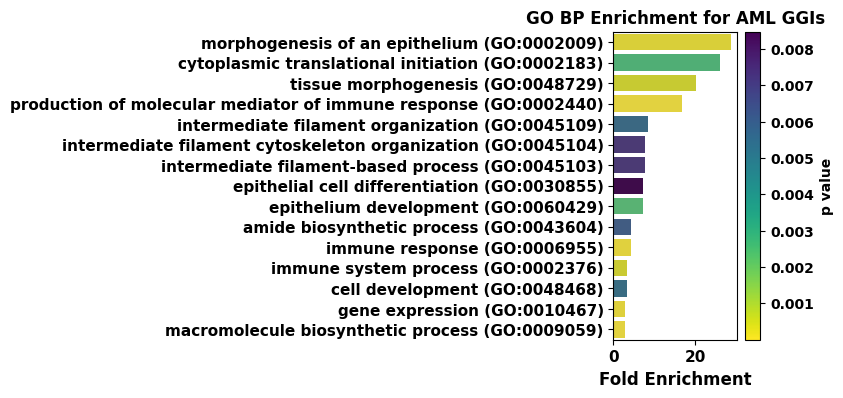

In [36]:
#df = pd.read_excel('Samples/AML/allCombine/GO/top1k genes-GO biological process complete.xlsx',skiprows=6)
#df = pd.read_excel('Samples/AML/allCombine/GO/cluster2-GO biological process complete.xlsx', skiprows=6)
#df = pd.read_excel('Samples/AML/allCombine/GO/cluster2-PANTHER GO -SlimBiologicalProcess.xlsx', skiprows=6)
df = pd.read_excel('Samples/AML/allCombine/new/71AMLGGI-genelist-BP.xlsx', skiprows=6)

#df = pd.read_excel('Samples/AML/allCombine/new/rest-genelist-BP.xlsx', skiprows=6)
df['upload_1 (fold Enrichment)'] = pd.to_numeric(df['upload_1 (fold Enrichment)'], errors='coerce')

significant_df = df[df['upload_1 (raw P-value)'] < 0.01]

# 按照Fold Enrichment排序，以便在图中显示更明显
significant_df = significant_df.sort_values('upload_1 (fold Enrichment)', ascending=False)
significant_df = significant_df.head(15)

newGoname = []

name = 'PANTHER GO-Slim Biological Process'
for i in significant_df[name].tolist():
    x = i.split(' ')
    if len(x)>8:
        x.insert(4, '\n')
        newi = ' '.join(x)
        newGoname.append(newi)
    else:
        newGoname.append(i)


significant_df[name] = newGoname



#df['upload_1 (fold Enrichment)'].dtype
# df = pd.read_excel('Samples/AML/allCombine/GO/cluster2-GO biological process complete.xlsx', skiprows=6)
# df = pd.read_excel('Samples/AML/allCombine/GO/top1k genes-GO biological process complete.xlsx',skiprows=6)
# df['upload_1 (fold Enrichment)'] = pd.to_numeric(df['upload_1 (fold Enrichment)'], errors='coerce')

# significant_df = df[df['upload_1 (raw P-value)'] < 0.01]

# # 按照Fold Enrichment排序，以便在图中显示更明显
# significant_df = significant_df.sort_values('upload_1 (fold Enrichment)', ascending=False)
# significant_df = significant_df.head(10)


# 创建一个标准化的颜色映射
norm = plt.Normalize(significant_df['upload_1 (raw P-value)'].min(), significant_df['upload_1 (raw P-value)'].max())
cmap = plt.cm.viridis_r

#plt.figure(figsize=(2, 4))
#ig, axs = plt.subplots(figsize=(2,4)) 
plt.figure(figsize=(2,4))

barplot = sns.barplot(
    x='upload_1 (fold Enrichment)', 
    y=name, 
    data=significant_df, 
    palette=cmap(norm(significant_df['upload_1 (raw P-value)'])),
    dodge=False
)

# 移除默认的图例
#barplot.get_legend().remove()

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=barplot, orientation='vertical')
cbar.set_label('p value',fontsize=10, fontweight='bold')

cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontweight('bold')
    
# 添加标题和标签
plt.title('GO BP Enrichment for AML GGIs',fontsize=12,fontweight='bold')
plt.xlabel('Fold Enrichment',fontsize=12,fontweight='bold')
plt.ylabel('')


for label in barplot.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

# 调整X轴的字体大小和加粗
barplot.tick_params(axis='x', labelsize=11)
for label in barplot.get_xticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')
    
# 调整布局以确保图表不重叠
plt.tight_layout()

#plt.savefig(f'figs/AMLfig/restGenes-GO-BP.png',dpi=300, bbox_inches='tight')

plt.show()
